# Top Rated Movie (2010 - 2016) Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

!kaggle datasets download -d shahjhanalam/movie-data-analytics-dataset

In [2]:
conn = sql.connect('movie.sqlite')

# Create a cursor
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()

# Print the table names
print("Tables in the database:")
for table in table_names:
    print(table[0])

Tables in the database:
IMDB
earning
genre


In [3]:
for table in table_names:
    table_name = table[0]
    cursor.execute(f"SELECT COUNT(*) FROM {table_name};")
    row_count = cursor.fetchone()[0]
    print(f"Table '{table_name}' has {row_count} rows.")

Table 'IMDB' has 117 rows.
Table 'earning' has 117 rows.
Table 'genre' has 351 rows.


In [4]:
# Iterate through tables and get the column names for each table
for table in table_names:
    table_name = table[0]
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    column_names = [column[1] for column in columns]
    print(f"Columns in table '{table_name}':\n {', '.join(column_names)}\n")

Columns in table 'IMDB':
 Movie_id, Title, Rating, TotalVotes, MetaCritic, Budget, Runtime, CVotes10, CVotes09, CVotes08, CVotes07, CVotes06, CVotes05, CVotes04, CVotes03, CVotes02, CVotes01, CVotesMale, CVotesFemale, CVotesU18, CVotesU18M, CVotesU18F, CVotes1829, CVotes1829M, CVotes1829F, CVotes3044, CVotes3044M, CVotes3044F, CVotes45A, CVotes45AM, CVotes45AF, CVotes1000, CVotesUS, CVotesnUS, VotesM, VotesF, VotesU18, VotesU18M, VotesU18F, Votes1829, Votes1829M, Votes1829F, Votes3044, Votes3044M, Votes3044F, Votes45A, Votes45AM, Votes45AF, VotesIMDB, Votes1000, VotesUS, VotesnUS

Columns in table 'earning':
 Movie_id, Domestic, Worldwide

Columns in table 'genre':
 Movie_id, genre



In [5]:
query = """
SELECT
    i.*,
    e.Domestic,
    e.Worldwide,
    GROUP_CONCAT(g.genre, ', ') AS Genres
FROM
    IMDB i
JOIN
    earning e ON i.Movie_id = e.Movie_id
JOIN
    genre g ON i.Movie_id = g.Movie_id
GROUP BY
    i.Movie_id;
"""

# Read data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 55 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie_id      117 non-null    object 
 1   Title         117 non-null    object 
 2   Rating        117 non-null    float64
 3   TotalVotes    117 non-null    int64  
 4   MetaCritic    117 non-null    object 
 5   Budget        117 non-null    object 
 6   Runtime       117 non-null    object 
 7   CVotes10      117 non-null    object 
 8   CVotes09      117 non-null    object 
 9   CVotes08      117 non-null    object 
 10  CVotes07      117 non-null    object 
 11  CVotes06      117 non-null    object 
 12  CVotes05      117 non-null    object 
 13  CVotes04      117 non-null    object 
 14  CVotes03      117 non-null    object 
 15  CVotes02      117 non-null    object 
 16  CVotes01      117 non-null    object 
 17  CVotesMale    117 non-null    object 
 18  CVotesFemale  117 non-null    

In [7]:
numeric_columns = [
    'MetaCritic', 'Budget', 'Runtime',
    'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
    'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale', 'CVotesU18',
    'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044',
    'CVotes3044M', 'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
    'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F',
    'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
    'Votes45A', 'Votes45AM', 'Votes45AF', 'VotesIMDB', 'Votes1000', 'VotesUS', 'VotesnUS'
]

# Convert columns to numeric
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 55 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie_id      117 non-null    object 
 1   Title         117 non-null    object 
 2   Rating        117 non-null    float64
 3   TotalVotes    117 non-null    int64  
 4   MetaCritic    110 non-null    float64
 5   Budget        114 non-null    float64
 6   Runtime       0 non-null      float64
 7   CVotes10      117 non-null    int64  
 8   CVotes09      117 non-null    int64  
 9   CVotes08      117 non-null    int64  
 10  CVotes07      117 non-null    int64  
 11  CVotes06      117 non-null    int64  
 12  CVotes05      117 non-null    int64  
 13  CVotes04      117 non-null    int64  
 14  CVotes03      117 non-null    int64  
 15  CVotes02      117 non-null    int64  
 16  CVotes01      117 non-null    int64  
 17  CVotesMale    117 non-null    int64  
 18  CVotesFemale  117 non-null    

In [9]:
pd.set_option('display.max_columns', None)
df

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Domestic,Worldwide,Genres
0,10015,Disconnect (2012),7.6,65448,64.0,10000000.0,NaN,6085,9374,22255,18117,6206,1830,684,292,197,411,44411,12217,75,48,25,24661,18309,6083,24359,19571,4457,5324,4304,925,292,7004,36390.0,7.6,7.6,7.9,8.0,7.9,7.7,7.7,7.7,7.5,7.5,7.4,7.4,7.4,7.6,5.9,6.4,7.4,7.5,1436900,1.436900e+06,", Drama, Thriller"
1,10023,Wreck-It Ralph (2012),7.7,295125,72.0,165000000.0,NaN,41980,50262,96477,67934,24894,7748,2724,1190,703,1226,190983,50202,1663,1182,467,120962,90759,29003,90203,74767,14148,13706,11356,2112,614,44962,129487.0,7.7,7.8,7.9,7.9,8.0,7.9,7.9,7.9,7.6,7.6,7.7,7.4,7.4,7.5,7.4,7.2,7.9,7.6,189422889,4.712229e+08,"Adventure, Animation, Comedy"
2,10099,Big Hero 6 (2014),7.8,315485,74.0,165000000.0,NaN,50311,61304,103726,65681,22389,6830,2251,1036,539,1439,187383,58731,2446,1571,855,128237,91744,35122,84098,68040,14796,13974,11304,2400,525,36702,131818.0,7.7,8.2,8.2,8.0,8.7,7.9,7.8,8.3,7.7,7.6,8.0,7.6,7.6,7.9,7.9,7.2,7.9,7.7,222527828,6.578186e+08,"Action, Adventure, Animation"
3,10454,The Avengers (2012),8.1,1056773,69.0,220000000.0,NaN,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958.0,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.9,7.4,8.3,7.9,623357910,1.518813e+09,", Action, Sci-Fi"
4,10617,Bridge of Spies (2015),7.6,223756,81.0,40000000.0,NaN,15757,32840,83322,63800,19183,5178,1657,735,419,878,152707,23978,846,732,104,76784,64810,11177,70780,61525,8196,18494,15504,2667,545,24273,105678.0,7.6,7.6,7.9,7.9,7.8,7.7,7.7,7.6,7.5,7.5,7.5,7.7,7.6,7.9,7.7,7.4,7.7,7.5,72313754,1.654783e+08,"Drama, History, Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,48554,Moneyball (2011),7.6,300199,87.0,50000000.0,NaN,20734,43329,108133,85628,27802,8094,2802,1304,778,1604,222663,34888,389,350,37,113508,97523,14950,112429,96552,14345,21998,17897,3726,645,55437,146951.0,7.6,7.3,8.0,8.1,7.6,7.7,7.8,7.3,7.5,7.5,7.2,7.5,7.5,7.5,7.7,7.1,7.8,7.5,75605492,1.102062e+08,"Biography, Drama, Sport"
113,48626,Captain Phillips (2013),7.8,350818,83.0,55000000.0,NaN,37461,70216,133266,76657,21791,6099,2051,1062,707,1517,247889,41602,995,838,147,131052,110723,19092,114418,98191,14686,24670,20178,4053,633,43042,165981.0,7.8,7.9,8.2,8.2,8.1,8.0,8.0,7.9,7.7,7.7,7.8,7.7,7.7,8.0,8.0,7.4,7.8,7.8,107100855,2.187918e+08,"Biography, Drama, Thriller"
114,49473,About Time (2013),7.8,225412,NaN,12000000.0,NaN,38556,43170,70850,45487,16542,5673,2210,1084,664,1182,126718,58098,654,325,321,92940,57778,34126,67477,50212,16222,13973,10690,3026,475,20450,111670.0,7.8,7.9,8.2,8.1,8.3,8.0,8.0,8.0,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7,15322921,8.710045e+07,"Comedy, Drama, Fantasy"
115,49518,Flipped (2010),7.7,66461,NaN,14000000.0,NaN,11354,11050,20808,14372,5412,1848,664,321,230,402,33714,22540,320,108,207,32475,16916,15217,18576,12982,5338,3399,2616,721,275,7362,36050.0,7.6,7.9,8.0,7.6,8.3,7.9,7.8,8.0,7.5,7.5,7.7,7.4,7.3,7.6,7.5,6.4,7.5,7.7,1755212,1.755212e+06,"Comedy, Drama, Romance"


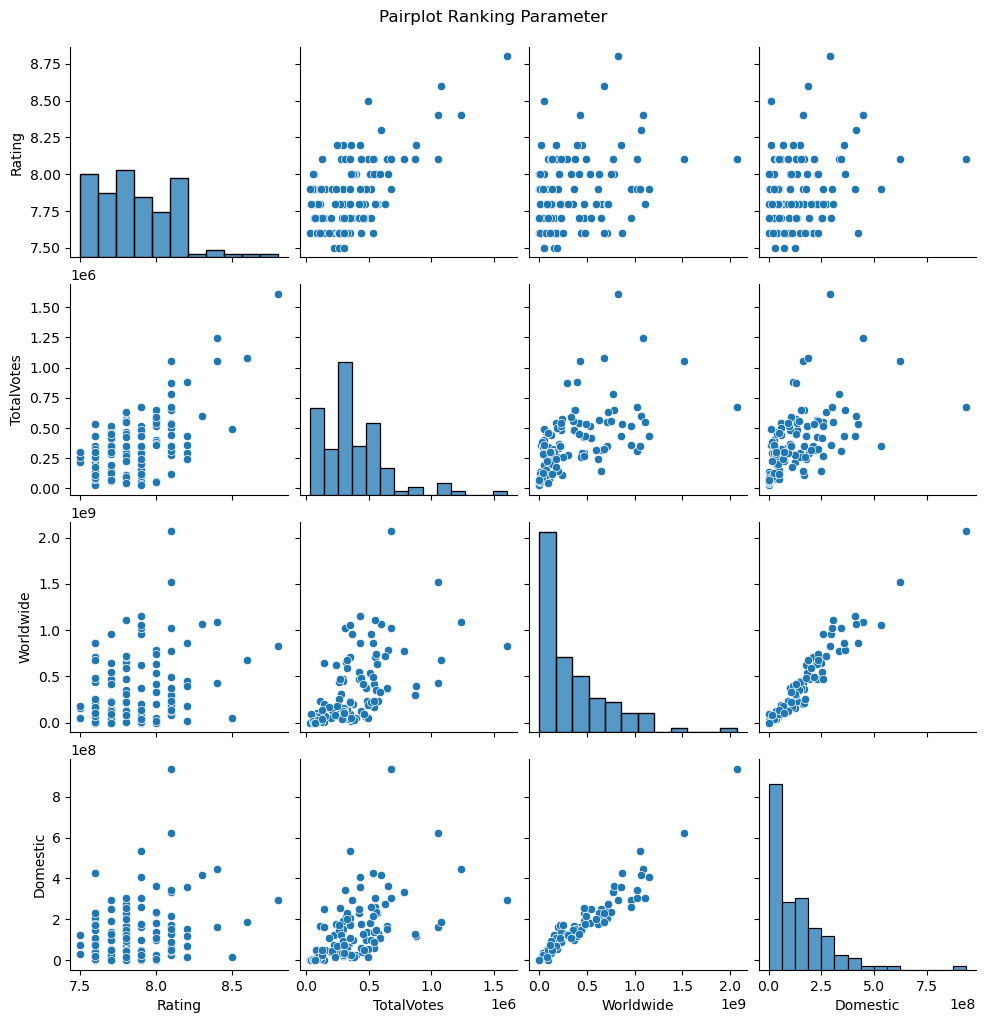

In [47]:
# Pairplot for Ranking Parameter
sns.pairplot(df[['Rating', 'TotalVotes', 'Worldwide', 'Domestic']])
plt.suptitle('Pairplot Ranking Parameter', y=1.02)
plt.show()

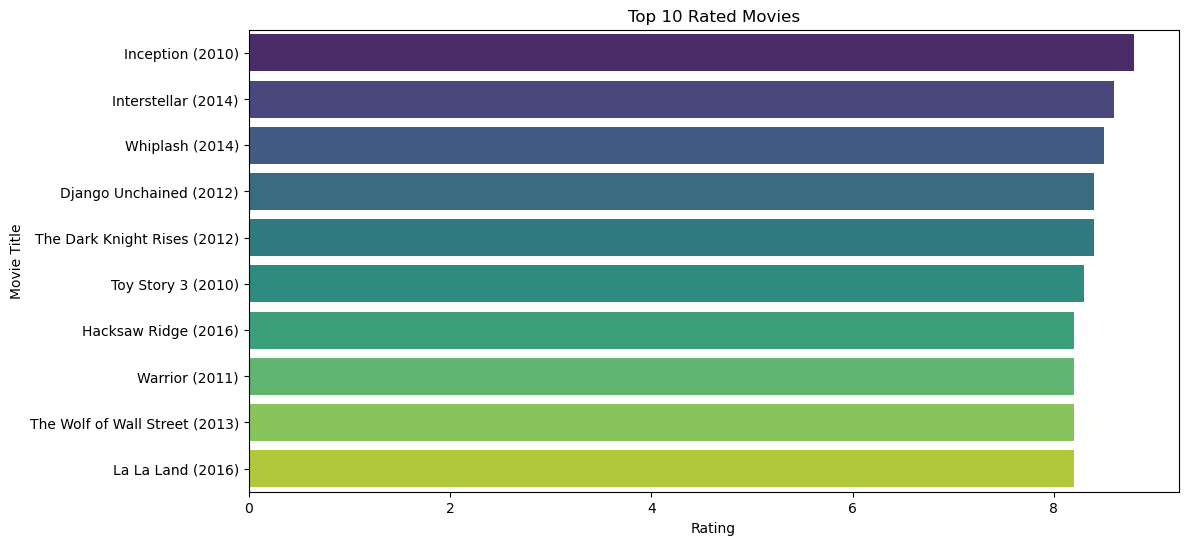

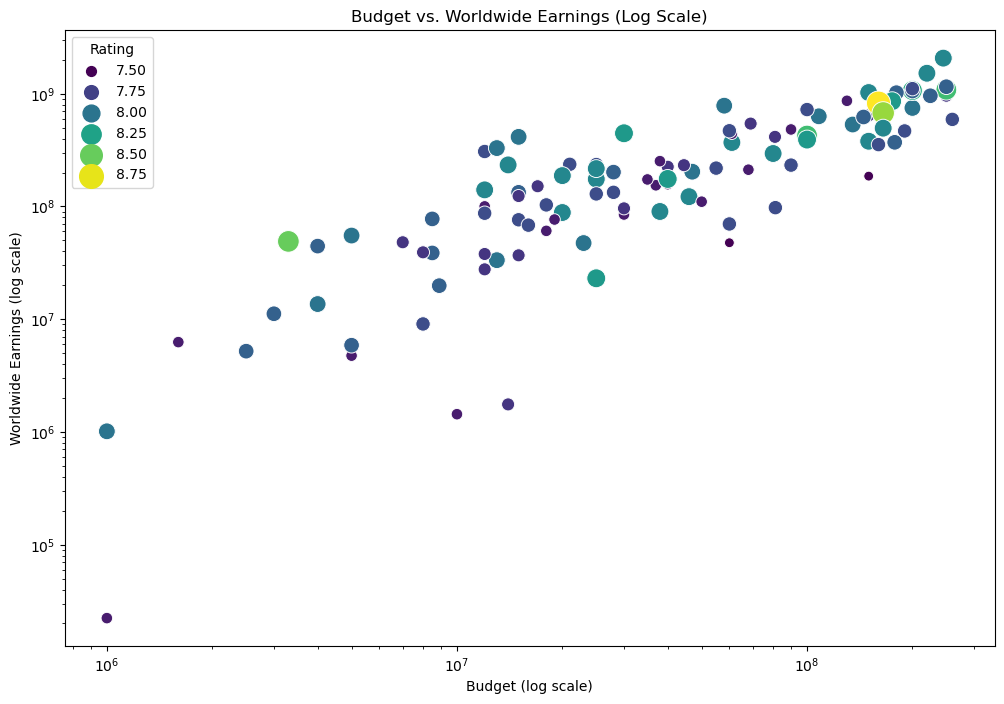

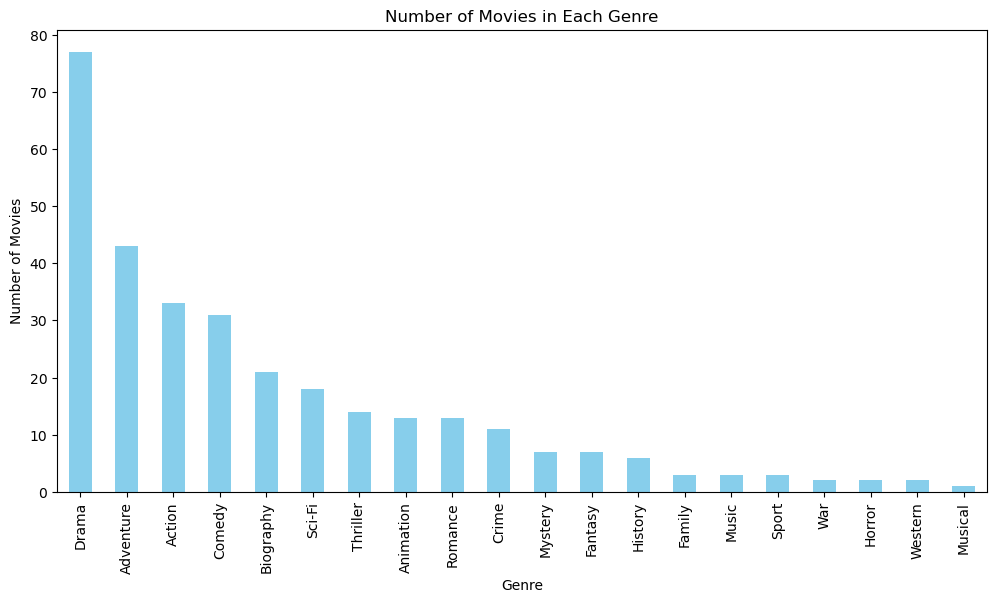

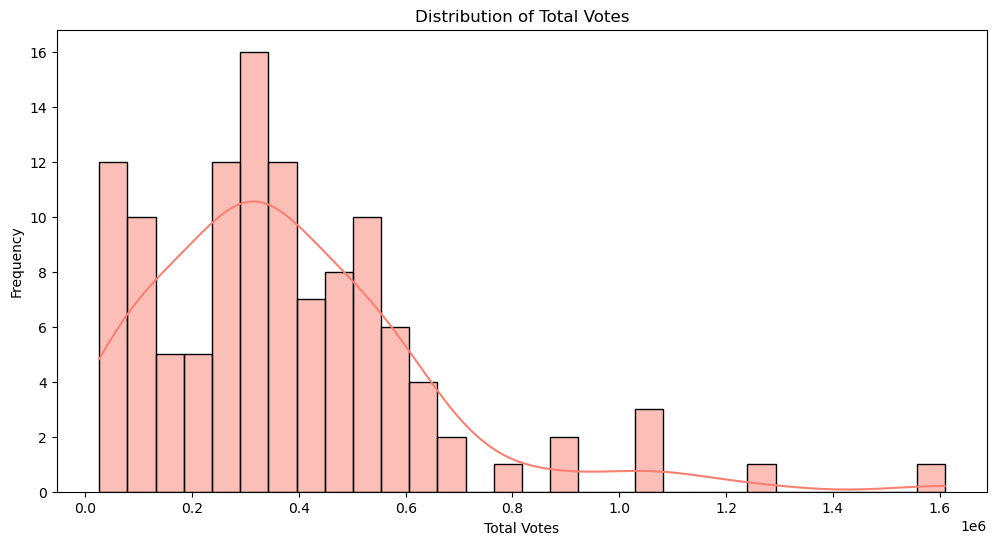

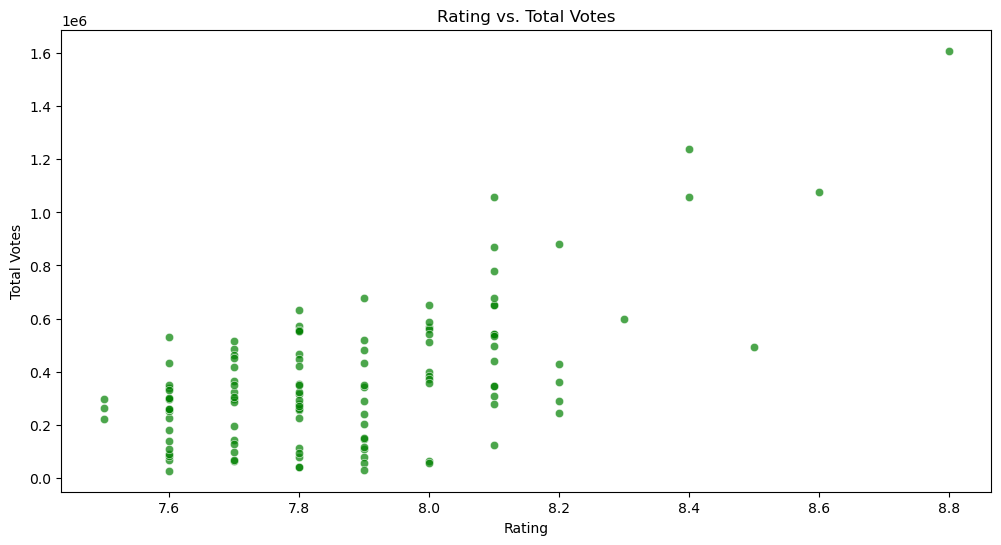

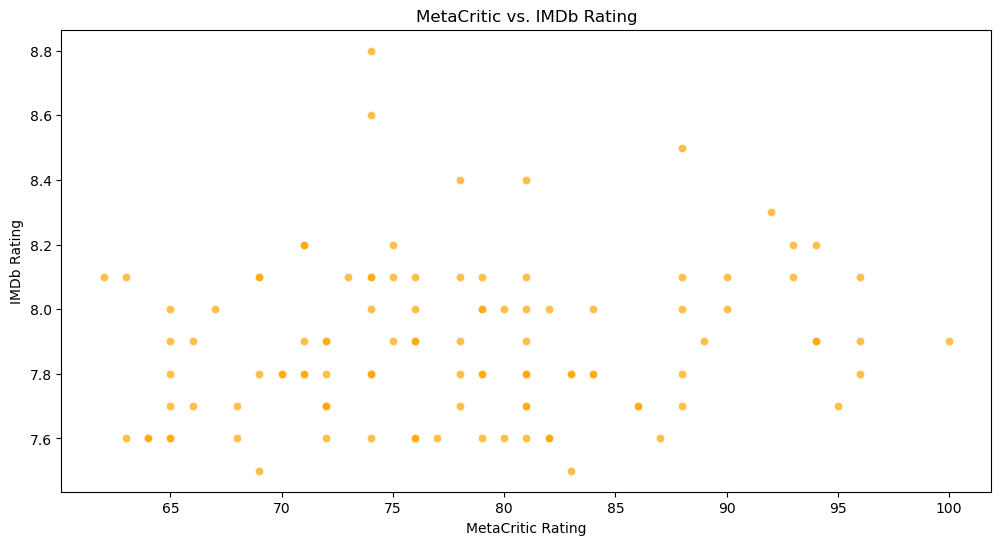

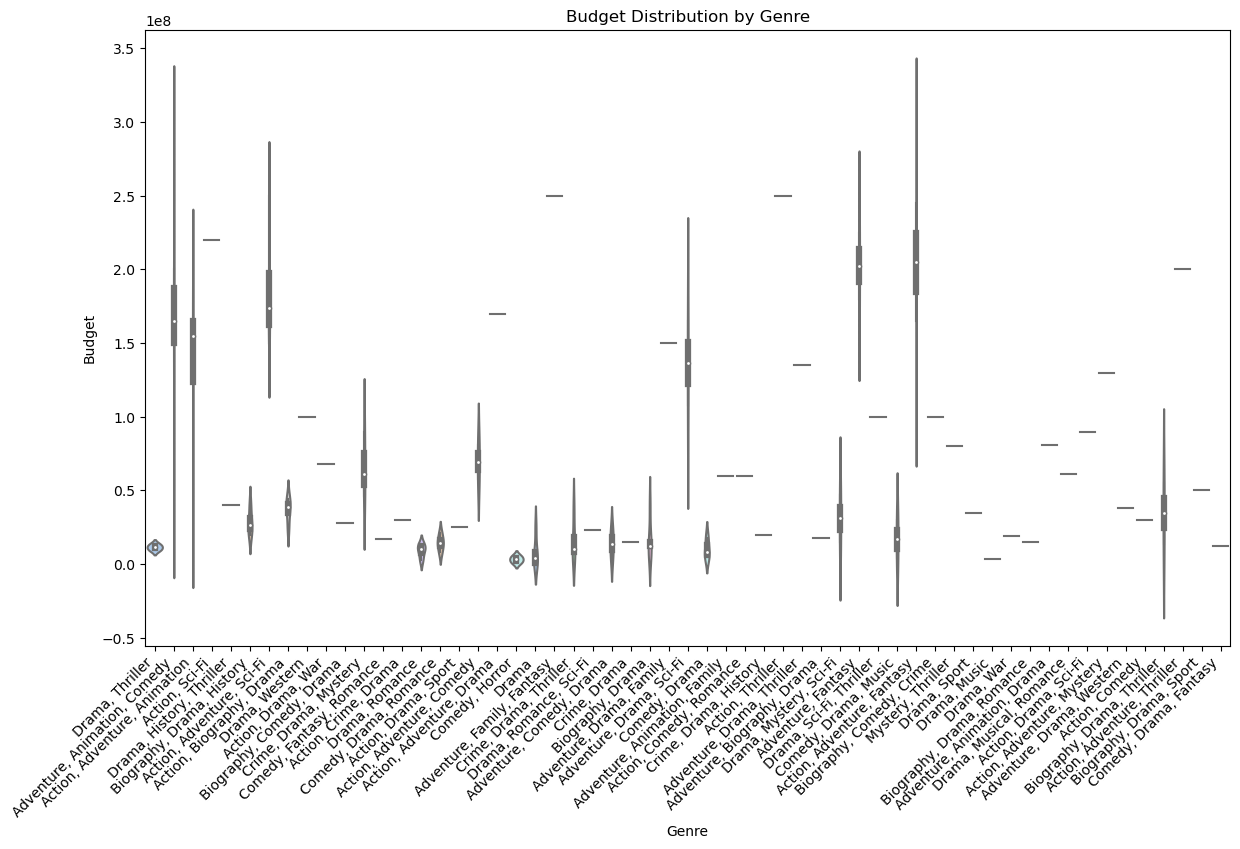

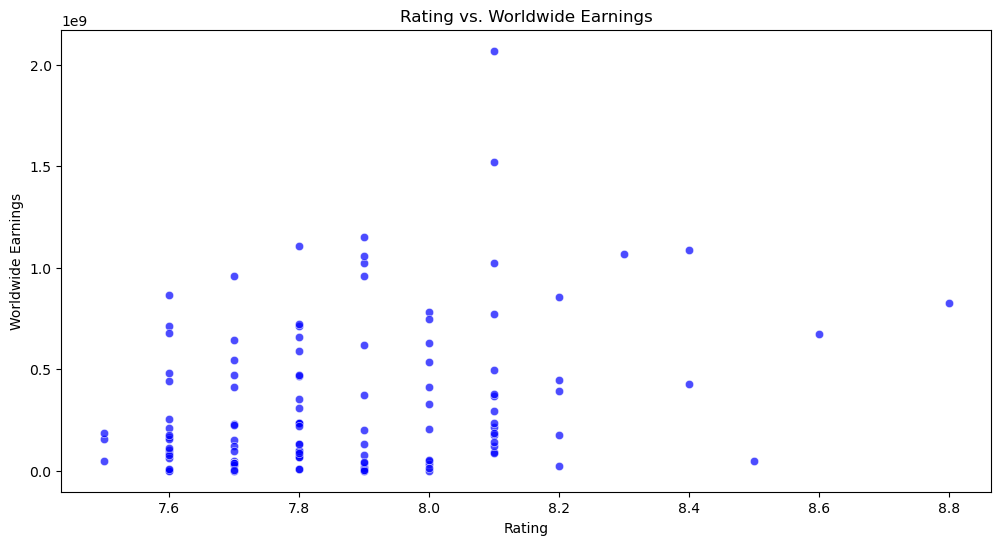

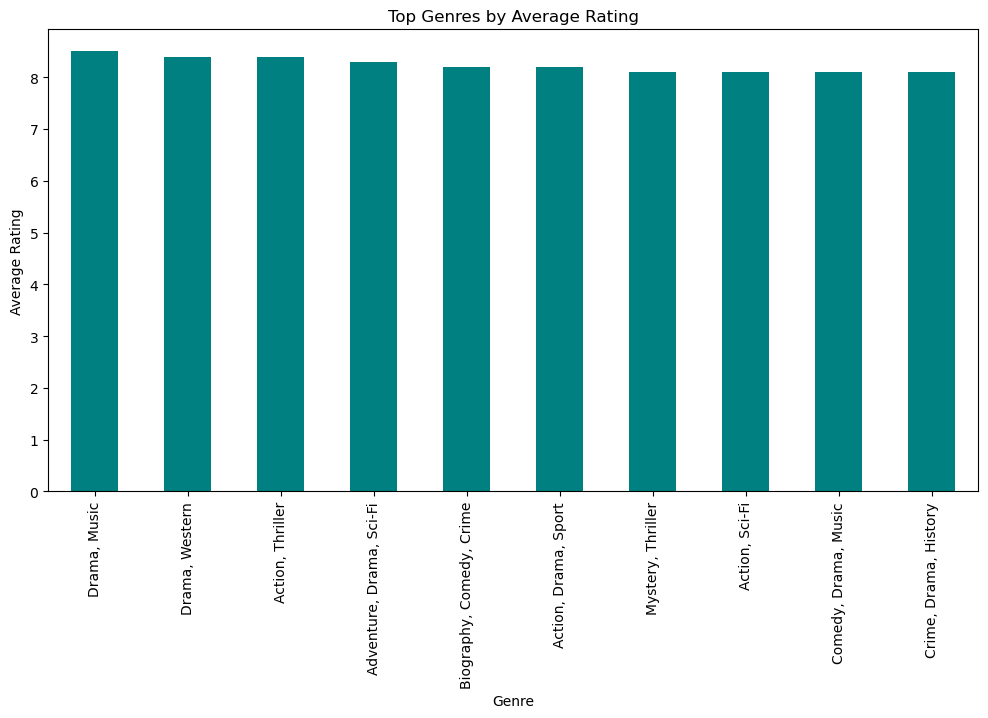

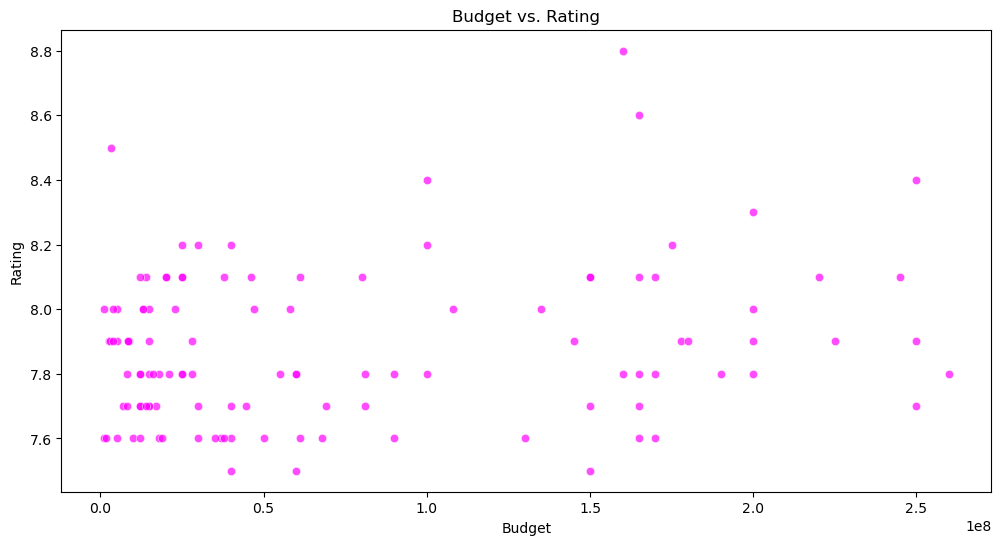

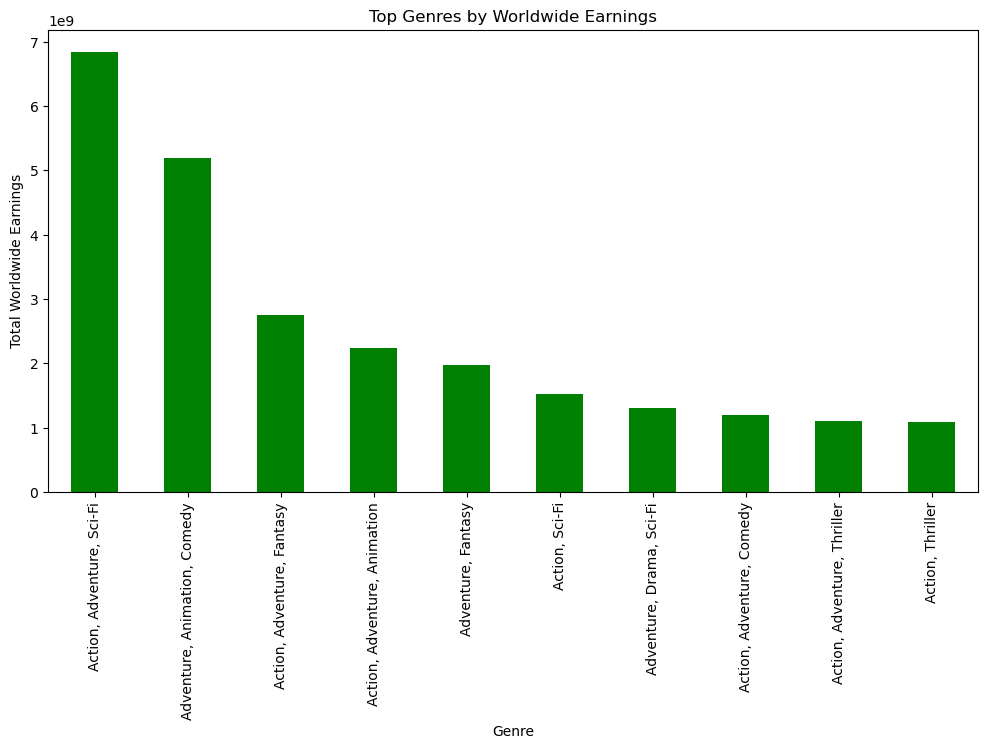

In [73]:
# Top Movie
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Title', data=top_rated_movies, palette='viridis')
plt.title('Top 10 Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()

# Movie Budget vs Earnings
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Budget', y='Worldwide', hue='Rating', data=df, palette='viridis', size='Rating', sizes=(50, 300))
plt.xscale('log')
plt.yscale('log')
plt.title('Budget vs. Worldwide Earnings (Log Scale)')
plt.xlabel('Budget (log scale)')
plt.ylabel('Worldwide Earnings (log scale)')
plt.show()

df['Genres'] = df['Genres'].str.lstrip(', ')
# Genre Analysis
plt.figure(figsize=(12, 6))
genre_counts = df['Genres'].str.split(', ').explode().value_counts()
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

# Distribution of Total Votes
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='TotalVotes', bins=30, kde=True, color='salmon')
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.show()

# Rating vs. Total Votes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating', y='TotalVotes', data=df, color='green', alpha=0.7)
plt.title('Rating vs. Total Votes')
plt.xlabel('Rating')
plt.ylabel('Total Votes')
plt.show()

# MetaCritic vs. IMDb Rating
df['MetaCritic'] = pd.to_numeric(df['MetaCritic'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='MetaCritic', y='Rating', data=df, color='orange', alpha=0.7)
plt.title('MetaCritic vs. IMDb Rating')
plt.xlabel('MetaCritic Rating')
plt.ylabel('IMDb Rating')
plt.show()

# Budget Distribution by Genre
plt.figure(figsize=(14, 8))
sns.violinplot(x='Genres', y='Budget', data=df, palette='pastel')
plt.title('Budget Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.xticks(rotation=45, ha='right')
plt.show()

# Relationship between Rating and Earnings
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating', y='Worldwide', data=df, color='blue', alpha=0.7)
plt.title('Rating vs. Worldwide Earnings')
plt.xlabel('Rating')
plt.ylabel('Worldwide Earnings')
plt.show()

# Top Genres by Rating
top_genres_by_rating = df.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_genres_by_rating.plot(kind='bar', color='teal')
plt.title('Top Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

# Relationship between Budget and Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Budget', y='Rating', data=df, color='magenta', alpha=0.7)
plt.title('Budget vs. Rating')
plt.xlabel('Budget')
plt.ylabel('Rating')
plt.show()

# Top Genres by Worldwide Earnings
top_genres_by_earnings = df.groupby('Genres')['Worldwide'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_genres_by_earnings.plot(kind='bar', color='green')
plt.title('Top Genres by Worldwide Earnings')
plt.xlabel('Genre')
plt.ylabel('Total Worldwide Earnings')
plt.show()

From the various plots above, we can draw several conclusions:

- The film production budget tends to correlate positively with film quality and revenue. This is evident from the plot showing a distribution of high ratings predominantly on the right side.

- Films with high ratings on average belong to genres such as Drama, Action, Adventure, and Comedy.

- A top-rated film typically has total votes ranging from 100,000 to 500,000 and a rating between 7.5 and 8.5. The best films exceed these figures in both total votes and rating.

- Ratings on the IMDB and MetaCritic platforms often differ. It's challenging to determine which is superior. However, IMDB seems to exhibit less variance when compared to MetaCritic.

- The budget allocation for a film is often based on producer agreements. However, looking at the upper limit of the genre distribution, adventure films tend to have the highest budgets.

- A high budget does not guarantee a high rating, but many highly-rated films are supported by a high budget.